# Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

In [59]:
from scipy.optimize import differential_evolution, minimize
from matplotlib import pylab as plt
import numpy as np

In [63]:
def base_func(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * (np.exp(-x/2))
def h(x):
    return base_func(x).astype(int)

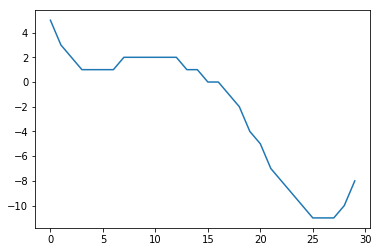

In [64]:
x = np.arange(0, 30, 1)
y = h(x)
plt.plot(x, y)
plt.show()

3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [71]:
minimize(h, 30, method="BFGS").fun

array([-5])

4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.


In [68]:
differential_evolution(h, [(0,30)]).fun

-11.0

5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [109]:
minimize(h, 1, method="BFGS")

      fun: array([3])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])

BFGS завершил свою работу на первой же итерации, потому что у негладкой функции нет производных.

6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.